<a href="https://colab.research.google.com/github/johanesraphaeln/data-fusion-experiment/blob/main/data_fusion_experiment_johanes_raphael_nandaputra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [162]:
from pandas import DataFrame
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure 
import pandas as pd
import numpy as np
from sympy import *
import math

# **Dataset**

In [163]:
data_acceleration = pd.read_excel('https://github.com/johanesraphaeln/data-fusion-experiment/blob/main/Acceleration%20without%20g%202023-04-17%2011-05-32.xls?raw=true')
data_acceleration = data_acceleration[:12521] #potong data sesuai Time (s) yang ditentukan, yaitu 60 s

data_gyroscope = pd.read_excel('https://github.com/johanesraphaeln/data-fusion-experiment/blob/main/Gyroscope%20rotation%20rate%202023-04-17%2011-07-42.xls?raw=true')
data_gyroscope = data_gyroscope[:25034] #potong data sesuai Time (s) yang ditentukan, yaitu 60 s

sample_rate = 100 #100hz

In [164]:
data_acceleration

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.113613,0.857468,-0.046583,0.541237,1.015066
1,0.118397,0.792653,-0.005280,0.325649,0.856956
2,0.123180,0.683048,-0.042391,0.187428,0.709564
3,0.127963,0.518268,-0.027733,0.160833,0.543358
4,0.132746,0.394260,0.015362,0.246217,0.465080
...,...,...,...,...,...
12516,59.979882,2.644910,5.025913,1.150242,5.794688
12517,59.984665,2.430530,6.611541,1.009597,7.116125
12518,59.989448,2.965403,9.862215,2.830563,10.680308
12519,59.994232,1.845743,11.805330,3.866771,12.558842


In [165]:
data_gyroscope

,Time (s),Gyroscope x (rad/s),Gyroscope y (rad/s),Gyroscope z (rad/s),Absolute (rad/s)
0,0.128212,-0.042988,-0.378344,-0.022372,0.381435
1,0.130604,-0.032604,-0.384452,-0.041309,0.388037
2,0.132995,-0.022830,-0.380176,-0.063910,0.386186
3,0.135387,-0.013668,-0.364905,-0.077959,0.373390
4,0.137779,-0.003283,-0.342304,-0.094452,0.355111
...,...,...,...,...,...
25029,59.988749,0.411482,-3.468696,-0.453096,3.522281
25030,59.991141,0.256938,-3.218249,-0.629020,3.289196
25031,59.993533,0.104837,-2.961693,-0.791505,3.067425
25032,59.995924,-0.046653,-2.695364,-0.938109,2.854332


In [166]:
pi = 3.14159265359

accel_time = data_acceleration['Time (s)']
accel_x = data_acceleration['Linear Acceleration x (m/s^2)']
accel_y = data_acceleration['Linear Acceleration y (m/s^2)']
accel_z = data_acceleration['Linear Acceleration z (m/s^2)']

# ubah radian menjadi derajat
gyro_time = data_gyroscope['Time (s)']
gyro_x = data_gyroscope['Gyroscope x (rad/s)'] * 180/pi
gyro_y = data_gyroscope['Gyroscope y (rad/s)'] * 180/pi
gyro_z = data_gyroscope['Gyroscope z (rad/s)'] * 180/pi

# **Linear Acceleration**

<function matplotlib.pyplot.show(close=None, block=None)>

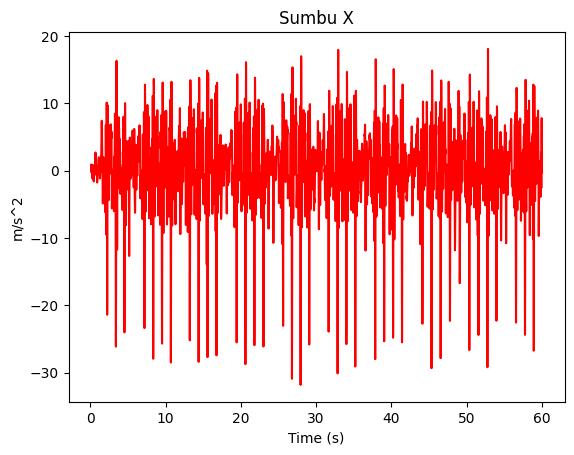

In [167]:
plt.title('Sumbu X')
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.plot(accel_time, accel_x, color = 'red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

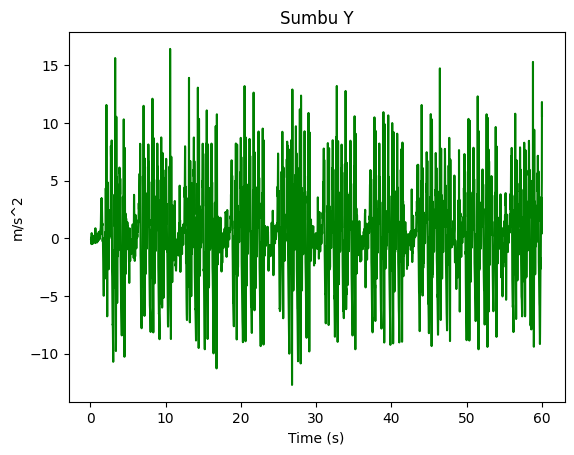

In [168]:
plt.title('Sumbu Y')
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.plot(accel_time, accel_y, color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

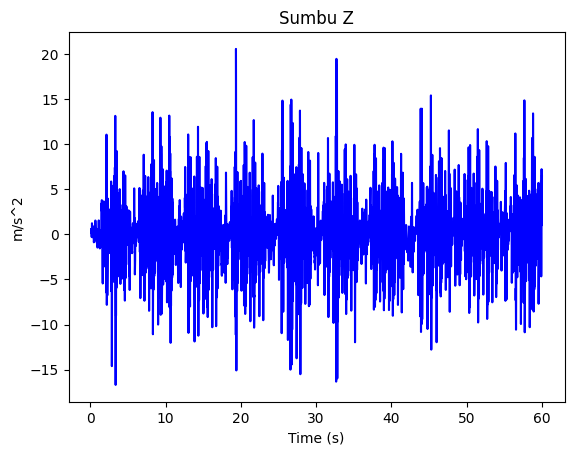

In [169]:
plt.title('Sumbu Z')
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.plot(accel_time, accel_z, color = 'blue')
plt.show

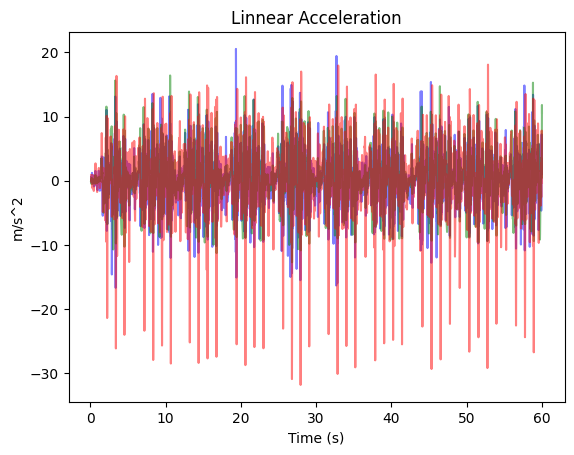

In [170]:
plt.title('Linnear Acceleration')
plt.plot(accel_time, accel_z, color = 'blue', alpha = 0.5)
plt.plot(accel_time, accel_y, color = 'green', alpha = 0.5)
plt.plot(accel_time, accel_x, color = 'red', alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.show()

# **Gyroscope**

<function matplotlib.pyplot.show(close=None, block=None)>

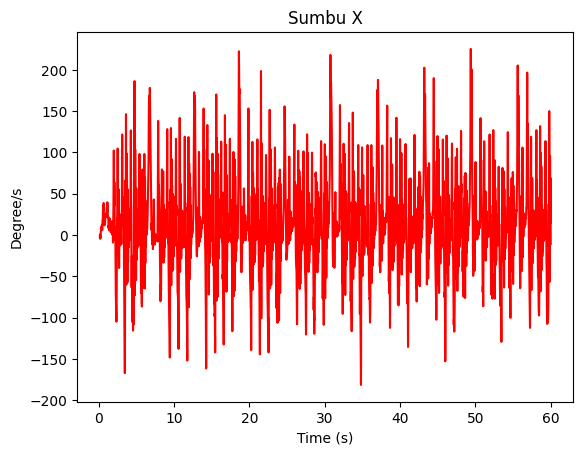

In [171]:
plt.title('Sumbu X')
plt.xlabel('Time (s)')
plt.ylabel('Degree/s')
plt.plot(gyro_time,gyro_x, color = 'red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

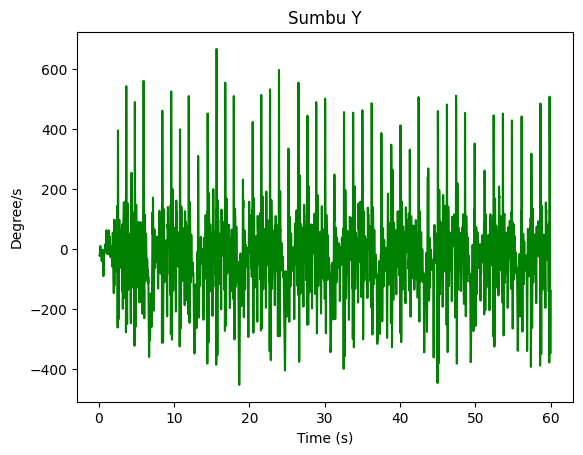

In [172]:
plt.title('Sumbu Y')
plt.xlabel('Time (s)')
plt.ylabel('Degree/s')
plt.plot(gyro_time,gyro_y, color = 'green')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

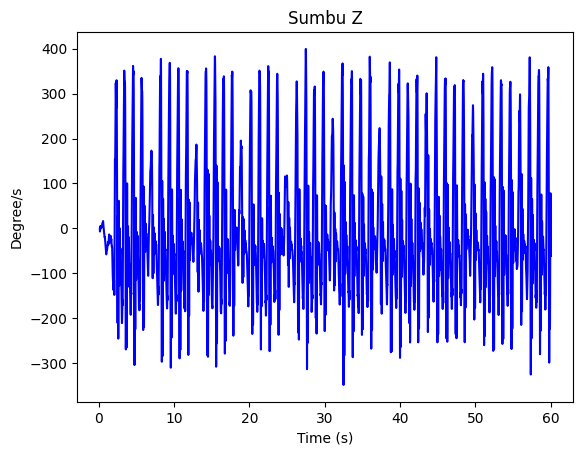

In [173]:
plt.title('Sumbu Z')
plt.xlabel('Time (s)')
plt.ylabel('Degree/s')
plt.plot(gyro_time,gyro_z, color = 'blue')
plt.show

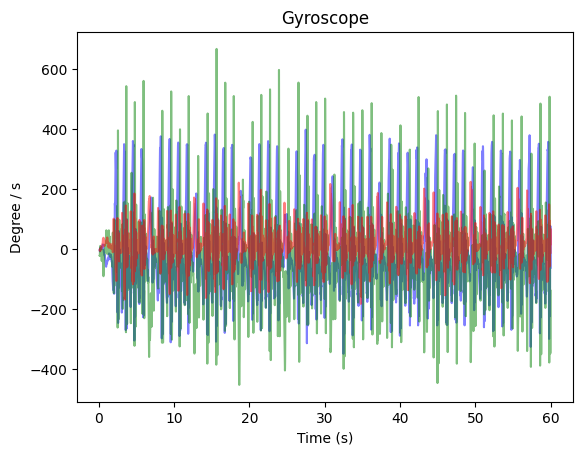

In [174]:
plt.title('Gyroscope')
plt.plot(gyro_time,gyro_z, color = 'blue', alpha = 0.5)
plt.plot(gyro_time,gyro_y, color = 'green', alpha = 0.5)
plt.plot(gyro_time,gyro_x, color = 'red', alpha = 0.5)
plt.xlabel('Time (s)')
plt.ylabel('Degree / s')
plt.show()

# **Sudut Accelerometer**

In [175]:
def sudutAccel(x, y, z):
  sudutAccRho = math.atan(z/math.sqrt((y*y)+(x*x)))
  return sudutAccRho

dataSudutAccel = {"Sudut Accelerometer": []}
df = pd.DataFrame(dataSudutAccel)

lengthAccel = len(accel_x)
i = 0
for i in range(lengthAccel):
  values = 180 / pi * sudutAccel(accel_x[i], accel_y[i], accel_z[i]) / 2
  df.loc[i] = values

dataSudutAccel = df
print("Sudut Max: ", dataSudutAccel.max().values)
print("Sudut Min: ", dataSudutAccel.min().values)
print("Sudut Mean: ", dataSudutAccel.mean().values)
print(dataSudutAccel)

Sudut Max:  [44.45410578]
Sudut Min:  [-44.54137347]
Sudut Mean:  [-0.7484591]
       Sudut Accelerometer
0                16.111090
1                11.167052
2                 7.658111
3                 8.608681
4                15.982700
...                    ...
12516             5.724612
12517             4.078165
12518             7.684258
12519             8.966130
12520            15.653107

[12521 rows x 1 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

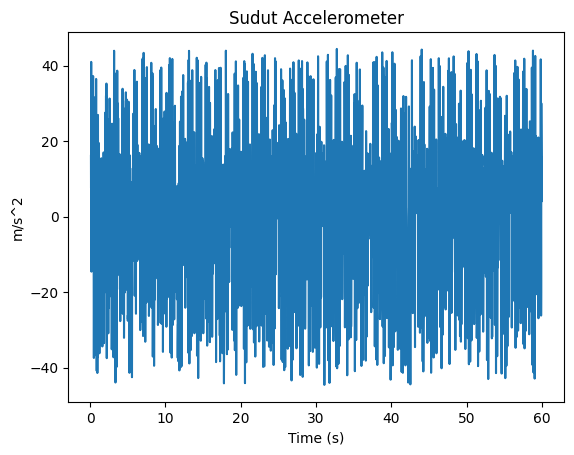

In [176]:
plt.title('Sudut Accelerometer')
plt.xlabel('Time (s)')
plt.ylabel('m/s^2')
plt.plot(accel_time, dataSudutAccel)
plt.show

# **Sudut Gyroscope**

In [177]:
def gyroAngle(z, time, previousTime):
  kenaikanWaktu = time - previousTime
  kenaikanSudut = z * kenaikanWaktu
  gyroAngle = (z + kenaikanSudut)/2
  return gyroAngle
  

dataSudutGyro = {"Sudut Gyro": []}  
df = pd.DataFrame(dataSudutGyro)

lengthGyro = len(gyro_z)
i = 0
for i in range (lengthGyro):
  if (i > 0):
    values = 180/pi*(gyroAngle(gyro_y[i],gyro_time[i],gyro_time[i-1]))/2
    df.loc[i] = [values]
  else:
    df.loc[i] = gyro_y[i]

In [178]:
dataSudutGyro = df
print("Sudut Max: ", dataSudutGyro.max().values)
print("Sudut Min: ", dataSudutGyro.min().values)
print("Sudut Mean: ", dataSudutGyro.mean().values)
print(dataSudutGyro)

Sudut Max:  [9599.74580147]
Sudut Min:  [-6489.4473246]
Sudut Mean:  [-336.16298488]
        Sudut Gyro
0       -21.677487
1      -316.274958
2      -312.757328
3      -300.194251
4      -281.600936
...            ...
25029 -2853.572772
25030 -2647.538859
25031 -2436.479404
25032 -2217.379699
25033 -1982.199160

[25034 rows x 1 columns]


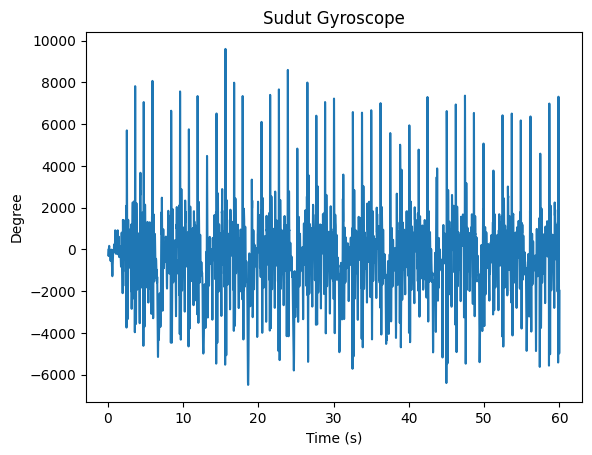

In [179]:
plt.title('Sudut Gyroscope')
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.plot(gyro_time, dataSudutGyro)
plt.show()

# **Complementary Filter**

In [180]:
def complementaryFilter(prevSudut ,dataSudutGyro,dataSudutAccel):
  sudut = 0.98*(prevSudut + dataSudutGyro) + 0.02*(dataSudutAccel)
  return sudut

In [181]:
dataSudutCF = {"Sudut CF": []}  
df = pd.DataFrame(dataSudutCF)

sample = 12520


prevSudut = 0
for i in range (sample):
  values = complementaryFilter(prevSudut, dataSudutGyro['Sudut Gyro'][i], dataSudutAccel['Sudut Accelerometer'][i])
  df.loc[i] = [values]
  prevSudut = values

dataSudutCF = df
dataSudutCF

,Sudut CF
0,-20.921716
1,-330.229399
2,-629.973831
3,-911.392546
4,-1168.813959
...,...
12515,26287.846514
12516,32797.657548
12517,39060.030895
12518,45006.642060


Sudut CF    102391.911756
dtype: float64
Sudut CF   -219626.935354
dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

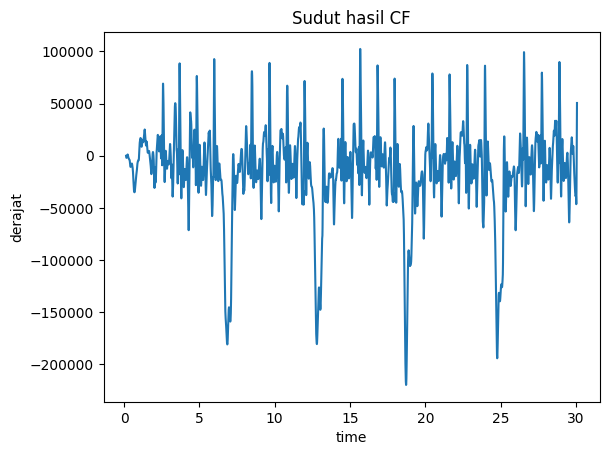

In [182]:
timeCF = {"time CF": []}  
df = pd.DataFrame(timeCF)
for i in range (12520):
  df.loc[i] = gyro_time[i]
timeCF = df

plt.title('Sudut hasil CF')
plt.ylabel('derajat')
plt.xlabel('time')
plt.plot(timeCF,dataSudutCF)
print(dataSudutCF.max())
print(dataSudutCF.min())
plt.show

**Sudut Gait Angle**

In [183]:
dataSudutGait = {"Sudut Gait": []}  
df = pd.DataFrame(dataSudutGait)

def gaitAngle(dataSudutCF):
  if (dataSudutCF < 0 ):
    return 0
  else:
    return dataSudutCF

In [184]:
for i in range (sample):
  values = gaitAngle(dataSudutCF['Sudut CF'][i])
  df.loc[i] = [values]

dataSudutGait = df

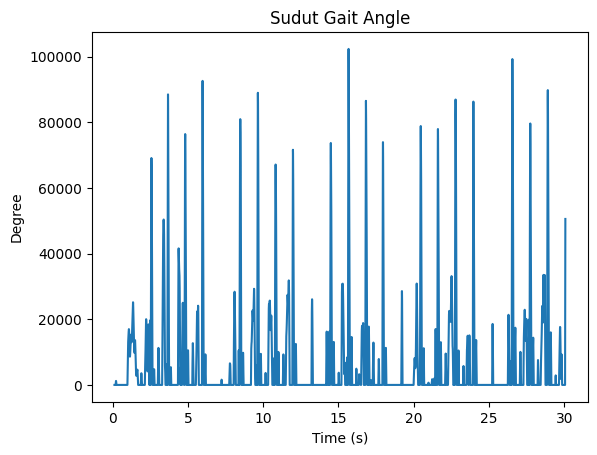

In [186]:
plt.title('Sudut Gait Angle')
plt.xlabel('Time (s)')
plt.ylabel('Degree')
plt.plot(timeCF,dataSudutGait)
plt.show()